# Mount Drives

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.

# PyDrive simplifies many common Google Drive API tasks.
!pip install -U -q PyDrive
# -q means quiet

# provide the ability to authenticate to Google APIs using various methods.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:
# Be able to work within google folder
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Final_project")
!ls 

 awards.pkl	    Oscars.csv		   topics_noms_tpot_folder
 combined_df.pkl    rotten_all_movie.csv   topic_tpot_folder
 lastly.py	    semifinal_df.pkl	   tpot_folder
'Mod5 Ideas.gdoc'   show_tpot_folder	   unbalanced.py
 model_adrw.pkl     smote.py		   wiki_movie_plots_deduped.csv
 modeling.pkl	    smt_tpot_folder	   x.py
 model.py	    stmoptimizer.py
 new_tpot_folder    tomek.py


In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil -q
!pip install psutil -q
!pip install humanize -q
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.9 GB  | Proc size: 143.4 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


# Import Libraries

In [0]:
!pip install pyldavis -q
!pip install deap update_checker tqdm stopit -q
!pip install xgboost -q
!pip install dask[delayed] dask-ml -q
!pip install tpot -q
!pip3 install fuzzywuzzy[speedup] -q


    100% |████████████████████████████████| 1.6MB 15.5MB/s 
    100% |████████████████████████████████| 942kB 21.1MB/s 
    100% |████████████████████████████████| 112kB 4.9MB/s 
    100% |████████████████████████████████| 901kB 22.1MB/s 
    100% |████████████████████████████████| 51kB 6.8MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 50)
import nltk
import sklearn
from sklearn.dummy import DummyClassifier
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler, Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator, ZeroCount, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz
# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

nltk.download('stopwords')
stopwords.words("english")
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Get Data

In [0]:
oscars_df = pd.read_csv('Oscars.csv')

## Clean Raw Data

In [0]:
# Fixing Names of Movies that will create errors later...
oscars_df.loc[oscars_df['Name'] == 'Grand Illusion ', 'Name'] = 'La Grande Illusion'
oscars_df.loc[oscars_df['Film'] == 'Grand Illusion', 'Film'] = 'La Grande Illusion'

oscars_df.loc[(oscars_df['Name'] == 'The Invaders '), 'Name'] = '49th Parallel'
oscars_df.loc[(oscars_df['Film'] == 'The Invaders'), 'Name'] = '49th Parallel'

oscars_df.loc[(oscars_df['Name'] == 'MA*S*H '), 'Name'] = 'MASH'
oscars_df.loc[(oscars_df['Film'] == 'MA*S*H'), 'Name'] = 'MASH'


oscars_df.loc[(((oscars_df['Name'] == 'Henry V ') | 
                (oscars_df['Film'] == 'Henry V ')) & (oscars_df['Ceremony'] == 19)), 'Year'] = '1944'

oscars_df.loc[(oscars_df['Name'] == 'Sunset Blvd. '), 'Name'] = 'Sunset Boulevard' 
oscars_df.loc[(oscars_df['Film'] == 'Sunset Blvd.'), 'Film'] = 'Sunset Boulevard'

oscars_df.loc[(oscars_df['Name'] == "Meredith Willson's The Music Man "), 'Name'] = 'The Music Man'
oscars_df.loc[(oscars_df['Film'] == "Meredith Willson's The Music Man"), 'Film'] = 'The Music Man'

oscars_df.loc[(oscars_df['Name'] == "The Russians Are Coming The Russians Are Coming "), 'Name'] = 'The Russians Are Coming! The Russians Are Coming!' 
oscars_df.loc[(oscars_df['Film'] == "The Russians Are Coming The Russians Are Coming"), 'Film'] = 'The Russians Are Coming! The Russians Are Coming!'
# 
oscars_df.loc[(oscars_df['Name'] == "Cries and Whispers "), 'Name'] = 'Cries & Whispers'
oscars_df.loc[(oscars_df['Film'] == "Cries and Whispers"), 'Film'] = 'Cries & Whispers'
# 
oscars_df.loc[(oscars_df['Name'] == "Good Fellas "), 'Name'] = 'Goodfellas' 
oscars_df.loc[(oscars_df['Film'] == "Good Fellas"), 'Film'] = 'Goodfellas'
# 
oscars_df.loc[(oscars_df['Name'] == "The Postman (Il Postino) "), 'Name'] = "Il Postino: The Postman" 
oscars_df.loc[(oscars_df['Film'] == "The Postman (Il Postino)") , 'Film'] = "Il Postino: The Postman"
# 
oscars_df.loc[(oscars_df['Name'] == "Precious: Based on the Novel 'Push' by Sapphire "), 'Name'] = "Precious"
oscars_df.loc[(oscars_df['Film'] == "Precious: Based on the Novel 'Push' by Sapphire"), 'Film'] = "Precious"
# 
oscars_df.loc[(oscars_df['Name'] == "Atlantic City "), 'Year'] = '1980'
oscars_df.loc[(oscars_df['Film'] == "Atlantic City"), 'Year'] = '1980'
# 
oscars_df.loc[(oscars_df['Name'] == "The Champ "), 'Year'] = '1931'
oscars_df.loc[(oscars_df['Film'] == "The Champ"), 'Year'] = '1931'
# 
oscars_df.loc[(oscars_df['Name'] == "The Champ ") , 'Year'] = '1931'
oscars_df.loc[(oscars_df['Film'] == "The Champ") , 'Year'] = '1931'
#
oscars_df.loc[oscars_df['Name'] == 'Cries and Whispers ', 'Year'] = '1972'
oscars_df.loc[oscars_df['Film'] == 'Cries and Whispers', 'Year'] = '1972'

oscars_df.loc[oscars_df['Name'] == 'Picnic ', 'Year'] = '1956'
oscars_df.loc[oscars_df['Film'] == 'Picnic', 'Year'] = '1956'

In [0]:
# Best Film Categories: 
bst_film_names = ['Outstanding Picture', 'Outstanding Production','Outstanding Motion Picture', 'Best Motion Picture','Best Picture', 'Best Film']
dates = ['1927/1928','1928/1929', '1929/1930','1930/1931','1931/1932', '1932/1933']
new_dates = [x[-4:] for x in dates]

In [0]:
# ['overview', 'genre_ids']
oscars_df['Award'].replace(bst_film_names, ['Best Picture']*6, inplace=True)
oscars_df['Year'].replace(dates, new_dates, inplace=True)




# Text Functions

In [0]:
def remove_text_inside_brackets(text, brackets="()[]"):
    if type(text) == str:
      count = [0] * (len(brackets) // 2) # count open/close brackets
      saved_chars = []
      for character in text:
          for i, b in enumerate(brackets):
              if character == b: # found bracket
                  kind, is_close = divmod(i, 2)
                  count[kind] += (-1)**is_close # `+1`: open, `-1`: close
                  if count[kind] < 0: # unbalanced bracket
                      count[kind] = 0  # keep it
                  else:  # found bracket to remove
                      break
          else: # character is not a [balanced] bracket
              if not any(count): # outside brackets
                  saved_chars.append(character)
      return ''.join(saved_chars).strip()
    else:
      return text

In [0]:
def text_cleaner(description, stop_stem=False):
    '''uses regex to tokenize words and capture them from the description, 
    lowers the capitilization remove stop words, reduce to stem words, 
    and joins them all in a string'''
    
    pattern = r"([a-zA-Z\d]+(?:'[a-z\d]+)?)"
    
    description = description.translate(str.maketrans('','',string.punctuation))
    tokens_raw = nltk.regexp_tokenize(description, pattern)    
    tokens = [i.lower() for i in tokens_raw]
    if stop_stem:
      tokens_stopped = [w for w in tokens if not w in stop_words]
      stemmed = [stemmer.stem(word) for word in tokens_stopped]
      tokens = stemmed
    cleaned = ' '.join(tokens)
    return cleaned

In [0]:
def clean_frame(frame, to_clean):
  for col in to_clean:
    v = [x.strip() for x in frame[col].astype('str')]
    frame[col] = v
  return frame

In [0]:
def make_int(frame, to_clean):
  for col in to_clean:
    items = list()
    for x in frame[col]:
      if '.' in x:
        items.append(float(x))
      else:
        items.append(int(x.replace(',', '')))
#     v = [int(x) for x in frame[col].astype('int32')]
#     frame[col] = v
    frame[col] = items
  return frame

In [0]:
def get_list(frame, value):
  temp = frame[value].str.split(',')
  values = []
  for item in temp:
    values_dict = dict()
    for idx, val in enumerate(item):
      values_dict[value+str(idx)] = val
    values.append(values_dict)
  return values

## Use Functions

In [0]:
oscars_df = clean_frame(oscars_df, ['Year', 'Ceremony', 'Award', 'Name', 'Film'])
oscars_df = make_int(oscars_df, ['Year', 'Ceremony'])
oscars_df['Winner'].fillna(0, inplace=True)

In [0]:
## Set Best Picture DF with new Col names
best_pictures_all = oscars_df[(oscars_df['Award'] == 'Best Picture') & (oscars_df['Year'] > 1930)]
best_pictures_all.columns = ['Year','Ceremony' ,'Award','Winner' ,'Film', 'Production']

# Web Scrapping For Data

## Building Functions

In [0]:
import requests
from bs4 import BeautifulSoup
import re
import time

In [0]:
def webpage_html(url):
    r = requests.get(url)
    json = r.json()
    return json

In [0]:
base_url = 'http://www.omdbapi.com/'

# new_api => 82fa3771
# mine not paid
# api = '&apikey=32ed365f'

api = '&apikey=82fa3771'

In [0]:
def clean_name(name, punc=False):
  if punc == True:
    name = text_cleaner(name)
  if '&' in name:
    name = name.replace('&', '%26')
  listy = name.split()
  film = '+'.join(listy)
  return film
  

In [0]:
def get_data(frame):
  data = []
  x = 0
  for film, year in zip(frame.Film, frame.Year):
    
    film = clean_name(film)
    url = base_url + f'?t={film}&y={year}&plot=full'+ api
    json = webpage_html(url)
    if json['Response'] == 'False':
      url = base_url + f'?t={film}&y={year - 1}&plot=full'+ api
      json = webpage_html(url)
#       print(film)
#       print(x)
    if json['Response'] == 'False':
      url = base_url + f'?t={film}&y={year + 1}&plot=full'+ api
      json = webpage_html(url)
#       print(film)
#       print(x)
    elif json['Response'] == 'False':
      film = clean_name(film, True)
#       print(film)
#       print(x)
      url = base_url + f'?t={film}&plot=full'+ api
      json = webpage_html(url)
    
        
    items =['Title', 'Awards', 
            'Runtime', 'Genre', 'Director', 'Writer', 
            'Actors', 'Plot', 'Language', 'Country', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Released']
    new_item = dict()
    for item in items:
      new_item[item] = json[item]
    data.append(new_item)
    x += 1
  return data

## Using the Webscraper

In [0]:
trial = get_data(best_pictures_all)

In [0]:
trial[0]

{'Actors': "Richard Dix, Irene Dunne, Estelle Taylor, Nance O'Neil",
 'Awards': 'Won 3 Oscars. Another 2 wins & 4 nominations.',
 'Country': 'USA',
 'Director': 'Wesley Ruggles',
 'Genre': 'Drama, Western',
 'Language': 'English, French',
 'Metascore': 'N/A',
 'Plot': 'When the government opens up the Oklahoma territory for settlement, restless Yancey Cravat claims a plot of the free land for himself and moves his family there from Wichita. A newspaperman, lawyer, and just about everything else, Cravat soon becomes a leading citizen of the boom town of Osage. Once the town is established, however, he begins to feel confined once again, and heads for the Cherokee Strip, leaving his family behind. During this and other absences, his wife Sabra must learn to take care of herself and soon becomes prominent in her own right.',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '50%'}],
 'Released': '09 Feb 1931',
 'Runtime': '123 

In [0]:
## Create New DataFrame and concatinate it to Best Pictures Nominees
movie_info = pd.DataFrame(trial)
best_pictures_all = best_pictures_all.reset_index()
combined_df = pd.concat([movie_info ,best_pictures_all], axis=1)

## Cleaning Combined Data Frame

In [458]:
combined_df = make_int(combined_df, ['imdbRating', 'imdbVotes'])
y = combined_df[['Runtime']].applymap(lambda x: int(x[:-4]))
combined_df['Runtime'] = y

TypeError: ignored

In [0]:

combined_df['Released'] = combined_df[['Released']].applymap(lambda x: x[3:-5])
combined_df.loc[combined_df.Released == '', 'Released'] = ['Nov', 'Jan', 'Dec']# 11, 1, 12
combined_df['Released'] = combined_df['Released'].astype('category')


In [0]:
actors_df = pd.DataFrame(get_list(combined_df, 'Actors'))
genres_df = pd.DataFrame(get_list(combined_df, 'Genre'))
writer_df = pd.DataFrame(get_list(combined_df, 'Writer'))
director_df = pd.DataFrame(get_list(combined_df, 'Director'))

In [0]:
semifinal_df = pd.concat([combined_df, actors_df, genres_df, writer_df, director_df], axis=1 )

### Some EDA

In [0]:
semifinal_df.head(1)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ratings,Released,Runtime,Title,Writer,imdbRating,imdbVotes,level_0,index,Year,Ceremony,Award,Winner,Film,Production,Actors0,Actors1,Actors2,Actors3,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,Writer0,Writer1,Writer10,Writer2,Writer3,Writer4,Writer5,Writer6,Writer7,Writer8,Writer9,Director0,Director1,Director2,Director3,Director4
0,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",Won 3 Oscars. Another 2 wins & 4 nominations.,USA,Wesley Ruggles,"Drama, Western","English, French",N/A,When the government opens up the Oklahoma terr...,"[{'Source': 'Internet Movie Database', 'Value'...",Feb,123,Cimarron,"Edna Ferber (novel), Howard Estabrook (screen ...",6.0,4602,0,140,1931,4,Best Picture,1.0,Cimarron,RKO Radio,Richard Dix,Irene Dunne,Estelle Taylor,Nance O'Neil,Drama,Western,NaN,NaN,NaN,NaN,Edna Ferber (novel),Howard Estabrook (screen version),NaN,Howard Estabrook (dialogue),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wesley Ruggles,NaN,NaN,NaN,NaN


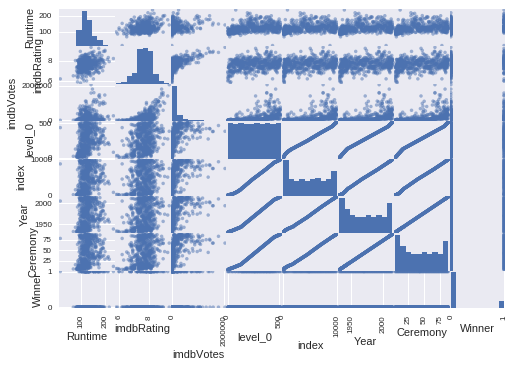

In [0]:
pd.plotting.scatter_matrix(semifinal_df);

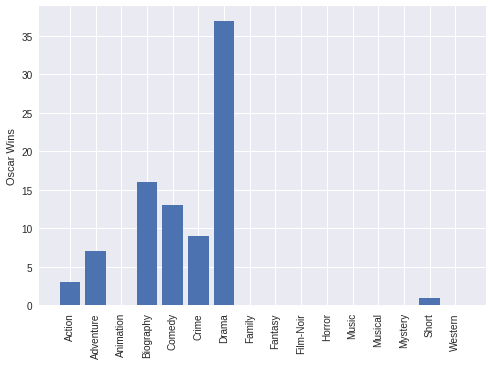

In [0]:
graphing = semifinal_df[['Genre0', 'Winner']]
grrr = graphing[graphing.Winner == 1]
gr = graphing.groupby(by='Genre0', group_keys=True).sum()
plt.xticks(rotation=90)
plt.ylabel('Oscar Wins')
plt.bar(gr.index, gr.Winner);

In [0]:
imdbratings = semifinal_df[['imdbRating', 'Winner']]
grr = imdbratings[imdbratings.Winner == 1]
to_drop = ['Animation', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical', 'Mystery', 'Short', 'Western']

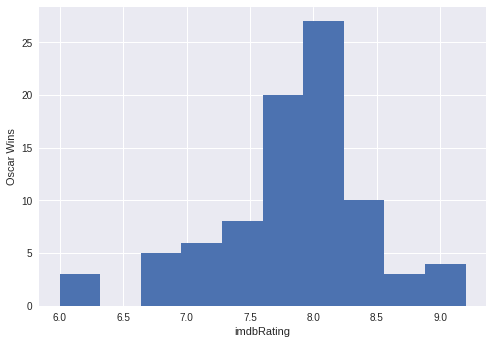

In [0]:
plt.ylabel('Oscar Wins')
plt.xlabel('imdbRating')
plt.hist(grr.imdbRating);

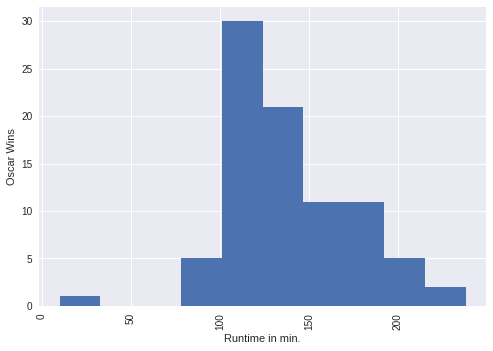

In [0]:
runtimes = semifinal_df[['Runtime', 'Winner']]
runtimes = runtimes[runtimes.Winner == 1]

# gr = runtimes.groupby(by='Runtime', group_keys=True).sum()

plt.xticks(rotation=90)
plt.ylabel('Oscar Wins')
plt.xlabel('Runtime in min.')
plt.hist(runtimes.Runtime);

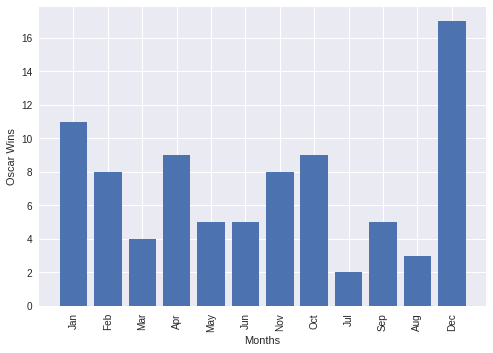

In [0]:
monthly = semifinal_df[['Released', 'Winner']]
monthly = monthly[monthly.Winner == 1]

mo = monthly.groupby(by='Released', group_keys=True).sum()
mo = mo.T[beg+end].T
plt.xticks(rotation=90)
plt.ylabel('Oscar Wins')
plt.xlabel('Months')
plt.bar(mo.index, mo.Winner);

<BarContainer object of 2 artists>

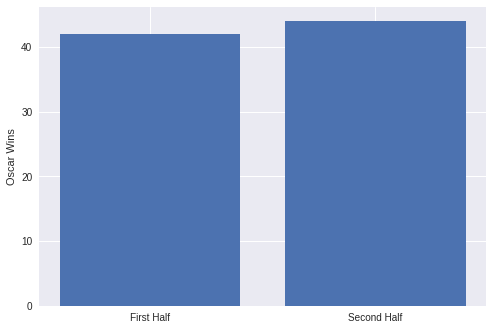

In [0]:
beg = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
end = ['Jul','Aug','Sep', 'Oct', 'Nov',   'Dec']

new_mo = mo.T.copy(deep=True)

x = new_mo[beg].sum().sum()
y = new_mo[end].sum().sum()
plt.ylabel('Oscar Wins')
plt.bar(['First Half', 'Second Half'], [x,y])

As we can see there are a lot of NaN values in the Dataframe... So we clean it up by removing them along with the Genre's that do not have so many wins.

In [0]:
columns = ['Year',
           'index',
           'Award',
           'Ceremony',
           'Actors',
           'Awards',
           'Country',
           'Director',
           'Genre',
           'Language',
           'Plot',
           'Released',
           'Runtime',
           'Title',
           'Writer',
           'Film',
           'Production',
           'Ratings',
           'Metascore',  
           'imdbRating', 
           'imdbVotes', 
           'Winner']

In [0]:
actors_cols = ['Actors0', 'Actors1', 'Actors2', 'Actors3']
genres_cols = ['Genre0', 'Genre1']
director_cols = ['Director0']
writer_cols = ['Writer0', 'Writer1']

In [0]:
semifinal_df = semifinal_df[columns + actors_cols + director_cols + genres_cols + writer_cols]
semifinal_df[writer_cols] = semifinal_df[writer_cols].applymap(remove_text_inside_brackets)

In [0]:
cols_to_have = semifinal_df.columns

# Getting Oscar Data For Everyone

In [0]:
# awards contains all the osar awards
# pd.to_pickle(awards, 'awards.pkl')
awards = pd.read_pickle('awards.pkl')

## Import fuzzywuzzy for fuzzy search and create functions

In [0]:
# Given a dataframe, name and year this will return the correct number of oscars won.
def get_oscars(name, year=2017):
  O = awards[(awards.apply(lambda row: fuzz.token_sort_ratio(row['Name'], name), axis=1) > 80) & (awards.Year < year)].Winner.sum()
  return O

In [0]:
def cycle_(dataframe):
  for i in range(len(dataframe)):
    for item in list(dataframe.columns)[:-1]:
      dataframe.loc[i,item] = get_oscars(dataframe.loc[i, item] , dataframe.loc[i, 'Year'])
  return dataframe

## Getting Oscar Wins

In [0]:
oscar_peeps_ad = semifinal_df[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Year']]
peeps_w_oscars = cycle_(oscar_peeps_ad)
peeps_w_oscars = peeps_w_oscars[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0']]
                          

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
genre_dummies = pd.get_dummies(semifinal_df[['Genre0']])
genre_dummies.columns = [x[7:] for x in genre_dummies.columns]


In [0]:
released_df = pd.get_dummies(semifinal_df[['Released']])
released_df.columns = [x[9:] for x in released_df.columns]
semifinal_df.drop('Released', inplace=True, axis=1)
semifinal_df.drop(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Genre0', 'Genre1'], inplace=True, axis=1)
modeling_df = pd.concat([peeps_w_oscars , genre_dummies,released_df ,semifinal_df], axis = 1)

# Final Columns before Plot is Analyzed

In [0]:
modeling_df = pd.read_pickle('modeling.pkl')

In [461]:
modeling_df.columns

Index(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Year', 'index',
       'Award', 'Ceremony', 'Actors', 'Awards', 'Country', 'Director', 'Genre',
       'Language', 'Plot', 'Runtime', 'Title', 'Writer', 'Film', 'Production',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Winner', 'Writer0',
       'Writer1'],
      dtype='object')

In [0]:
ceremony = modeling_df[['Ceremony']]

In [0]:
print(to_drop)

['Animation', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical', 'Mystery', 'Short', 'Western']


In [0]:
fcolumns = ['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western','Country', 'Plot',  'Runtime','imdbRating', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep','Awards','Winner']

In [0]:
modeling_df = modeling_df[fcolumns]

In [0]:
modeling_df.drop(to_drop, inplace=True, axis=1)

In [0]:
modeling_df.columns

Index(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Sci-Fi',
       'Country', 'Plot', 'Runtime', 'imdbRating', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Awards',
       'Winner'],
      dtype='object')

## More EDA

In [0]:
df = modeling_df[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Winner']]

df['Total'] = df[['Actors0', 'Actors1', 'Actors2', 'Actors3','Director0']].sum(axis=1)
df['Total_Act'] = df[['Actors0', 'Actors1', 'Actors2', 'Actors3']].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


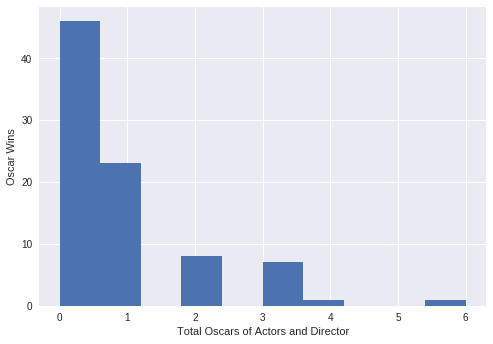

In [0]:
total_osc = df[['Total', 'Winner']]
total_osc = df[df.Winner == 1]
total_act = df[df.Winner ==1]
plt.ylabel('Oscar Wins')
plt.xlabel('Total Oscars of Actors and Director')
# plt.xticks(rotation=90)
plt.hist(total_osc.Total);

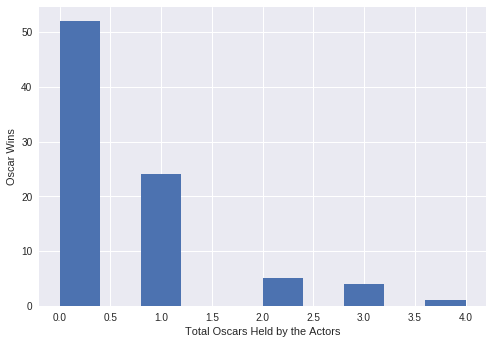

In [0]:
plt.ylabel('Oscar Wins')
plt.xlabel('Total Oscars Held by the Actors')
plt.hist(total_act.Total_Act);


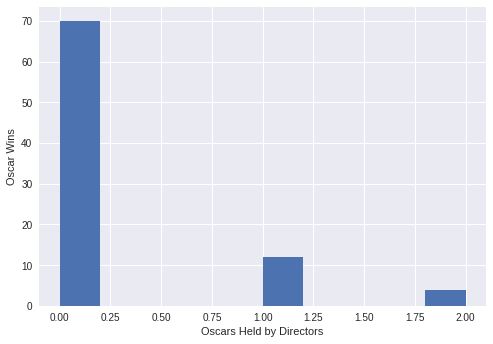

In [0]:
total_dir = df[['Director0', 'Winner']]
total_dir = df[df.Winner == 1]
# gr = runtimes.groupby(by='Runtime', group_keys=True).sum()

# plt.xticks(rotation=90)
plt.ylabel('Oscar Wins')
plt.xlabel('Oscars Held by Directors')
plt.hist(total_dir.Director0);

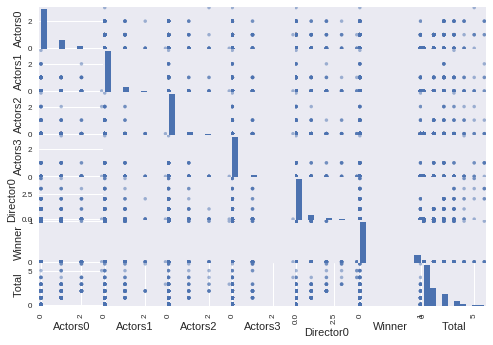

In [0]:
pd.plotting.scatter_matrix(df);

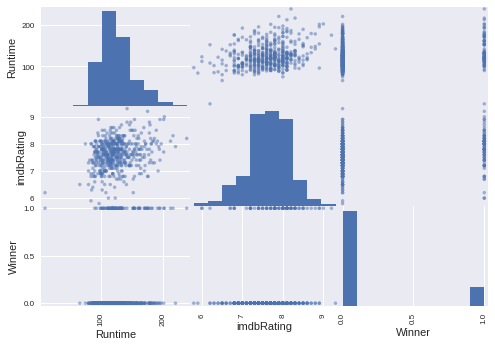

In [0]:
items = ['Runtime','imdbRating', 'Winner']
df = modeling_df[items]
pd.plotting.scatter_matrix(df);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


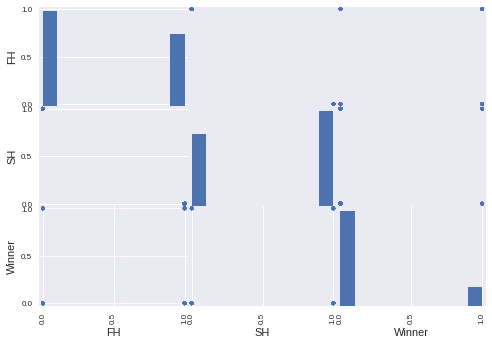

In [0]:
items = ['Apr', 'Aug', 'Dec', 'Feb','Jan', 'Jul', 
         'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Winner']
df = modeling_df[items]

beg = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
end = ['Nov', 'Oct', 'Jul', 'Sep', 'Aug', 'Dec']

df['FH'] = df[beg].sum(axis=1)
df['SH'] = df[end].sum(axis=1)

pd.plotting.scatter_matrix(df[['FH', 'SH', 'Winner']]);

In [0]:
df.describe()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Winner,FH,SH
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.00000,515.000000,515.000000
mean,0.067961,0.077670,0.174757,0.100971,0.100971,0.046602,0.058252,0.058252,0.044660,0.089320,0.099029,0.081553,0.16699,0.431068,0.568932
std,0.251924,0.267912,0.380129,0.301583,0.301583,0.210990,0.234448,0.234448,0.206758,0.285483,0.298992,0.273949,0.37333,0.495707,0.495707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In these graphs we can see that there is no clear win/no-win with respect to genres, or to the number of previous oscars won by the actors and directors however there is some sort of distinctions in therms of runtime and imdb Rating, it looks like Winners tend to have a runtime of 100-150 although some outliers appear and in terms of rating there are few movies that won that had a rating of less than 7.5.

In the end I will also be dropping out the months and instead replacing them by FH, SH as the mean of the values is slightly higher for SH

In [0]:
modeling_df['FH'] = modeling_df[beg].sum(axis=1)
modeling_df['SH'] = modeling_df[end].sum(axis=1)
# modeling_df.drop(beg+end, inplace=True)
modeling_df = modeling_df[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Sci-Fi'
                           ,'Country', 'Plot',  'Runtime','imdbRating','FH','SH','Awards','Winner']]


## More Features

In [0]:
def get_winss(listy):
  try:
    index = listy.index('win')
    wins = listy[index -1]
  except ValueError:
    index = listy.index('wins')
    wins = listy[index -1]
  return wins

def get_noms(listy):
  try:
    index = listy.index('nomination')
    noms = listy[index -1]
  except ValueError:
    index = listy.index('nominations')
    noms = listy[index -1]
  return noms

In [0]:
def get_wins_nom(listy):
  dicty = dict()
  
  if ('win' in listy) or ('wins' in listy):
    dicty['wins'] = get_winss(listy)
  else:
    dicty['wins'] = 0
    
  if ('nomination' in listy) or ('nominations' in listy):
    dicty['noms'] = get_noms(listy)
  else:
    dicty['noms'] = 0

  return dicty
    

In [0]:
k = modeling_df['Awards']
k = k.apply(lambda x: x[x.find('.')+2:-1] if type(x) == str else '0')
k = k.apply(lambda x: x.split())


In [0]:
awards_noms = pd.DataFrame(list(k.apply(get_wins_nom)))

In [0]:
modeling_df.drop('Awards', inplace=True, axis=1)

# Test-Train Split

In [0]:
X = modeling_df.iloc[:,:-1]
X = pd.concat([X, awards_noms], axis=1)
y = modeling_df.Winner

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# NLP on Plot

In [0]:
no_topics, no_top_words = 4, 10

In [0]:
# Note: Run Functions bellow before running this...
plot = X_train['Plot'].apply(text_cleaner)
test = X_test['Plot'].apply(text_cleaner)

### Functions

In [0]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
def text_cleaner(description):
    ''''''
    tokens_raw = nltk.regexp_tokenize(description, pattern)
    tokens = [i.lower() for i in tokens_raw]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    stemmed = [stemmer.stem(word) for word in tokens_stopped]
    cleaned = ' '.join(stemmed)
    return cleaned


In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

## Using TF-IDF for Topic Modeling with NMF

In [0]:
# NMF is able to use tf-idf
tfidf = TfidfVectorizer()

response = tfidf.fit_transform(plot)
testing_plot = tfidf.transform(test)

tfidf_feature_names = tfidf.get_feature_names()

plot_df = pd.DataFrame(response.toarray(), columns=tfidf_feature_names)
test_plot = pd.DataFrame(testing_plot.toarray(), columns=tfidf_feature_names)

In [0]:
plot_df.index = X_train.index
test_plot.index = X_test.index

In [0]:
nmf = NMF(n_components=no_topics, 
          random_state=1, 
          alpha=.1, 
          l1_ratio=.5, 
          init='nndsvd')
nmf.fit(plot_df)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvd', l1_ratio=0.5,
  max_iter=200, n_components=4, random_state=1, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [0]:
display_topics(nmf, plot_df.columns, no_top_words)

Topic 0:
life love father one find famili live year new get
Topic 1:
albert war enlist cavalri rage serv hors belov front sold
Topic 2:
capulet montagu juliet romeo verona famili tragedi parti marri daughter
Topic 3:
homer brother macauley europ remain younger older town widow small


In [0]:
topics = ['topic'+str(i) for i in range(nmf.n_components)]
nmf_train_df = pd.DataFrame(nmf.transform(plot_df), columns=topics)
nmf_test_df = pd.DataFrame(nmf.transform(test_plot), columns=topics)

In [0]:
nmf_train_df.index = X_train.index
nmf_test_df.index = X_test.index

In [0]:
X_train_plot = pd.concat([X_train, nmf_train_df], axis=1)
X_test_plot = pd.concat([X_test, nmf_test_df], axis=1)

X_train_plot.drop(['Plot', 'Country'], inplace=True, axis=1)
X_test_plot.drop(['Plot', 'Country'], inplace=True, axis=1)

## Using CountVectorizer for Topic Modeling with LDA

In [0]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer()

dtm_tf = tf_vectorizer.fit_transform(plot)
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(plot)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [0]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [0]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      33.115141        1       1 -0.037198  0.033227
3      31.061410        1       2 -0.061578  0.025811
2      18.480211        1       3  0.006775 -0.096883
1      17.343238        1       4  0.092001  0.037844, topic_info=     Category       Freq       Term       Total  loglift  logprob
term                                                             
4689  Default  16.000000      salli   16.000000  30.0000  30.0000
5484  Default  20.000000        tom   20.000000  29.0000  29.0000
3109  Default  11.000000    leopold   11.000000  28.0000  28.0000
5520  Default   9.000000      traci    9.000000  27.0000  27.0000
3926  Default  15.000000      parti   15.000000  26.0000  26.0000
5176  Default  69.000000      stori   69.000000  25.0000  25.0000
1013  Default   8.000000  cleopatra    8.000000  24.0000  24.0000
4936  Default  11.000000     singer   11.000000  23.0000  23.0000
1629  Default  33.000000         dr   33.000000  22.0000  22.0000
560   Default   7.000000     blacki    7.000000  21.0000  21.0000
500   Default   8.000000   benjamin    8.000000  20.0000  20.0000
2891  Default  22.000000       join   22.000000  19.0000  19.0000
681   Default  11.000000      brick   11.000000  18.0000  18.0000
2895  Default   8.000000       jone    8.000000  17.0000  17.0000
3136  Default   6.000000   lightcap    6.000000  16.0000  16.0000
2134  Default  24.000000      frank   24.000000  15.0000  15.0000
776   Default   9.000000     caesar    9.000000  14.0000  14.0000
5583  Default   6.000000     truman    6.000000  13.0000  13.0000
536   Default  19.000000      billi   19.000000  12.0000  12.0000
2948  Default   7.000000        kay    7.000000  11.0000  11.0000
4614  Default  10.000000        ron   10.000000  10.0000  10.0000
3728  Default  10.000000       nora   10.000000   9.0000   9.0000
1350  Default   7.000000       dave    7.000000   8.0000   8.0000
4894  Default  33.000000       show   33.000000   7.0000   7.0000
1491  Default   6.000000     dexter    6.000000   6.0000   6.0000
...       ...        ...        ...         ...      ...      ...
3198   Topic4   5.480227       lord   10.233653   1.1274  -6.7283
2153   Topic4  15.324177     friend   69.849950   0.2350  -5.7000
2134   Topic4   8.502529      frank   24.582118   0.6903  -6.2891
3799   Topic4  17.138500        one  113.127853  -0.1352  -5.5881
3167   Topic4  15.577237       live   95.838256  -0.0649  -5.6836
6022   Topic4  14.019766       year   90.616977  -0.1142  -5.7889
4213   Topic4   8.292343     prison   26.621206   0.5856  -6.3141
4941   Topic4   8.637737     sister   29.648789   0.5187  -6.2733
4894   Topic4   9.027744       show   33.544207   0.4394  -6.2291
5612   Topic4  12.385440        two   79.964491  -0.1131  -5.9129
5997   Topic4  12.323549       work   80.686670  -0.1271  -5.9179
5864   Topic4  10.839062        war   59.642798   0.0468  -6.0463
4532   Topic4   9.349047     return   39.867664   0.3017  -6.1941
1348   Topic4  10.662717   daughter   62.256304  -0.0125  -6.0627
1692   Topic4   6.957898      earli   17.684347   0.8192  -6.4895
3332   Topic4  10.331688      marri   62.313747  -0.0450  -6.0942
1544   Topic4   8.844408     discov   38.136656   0.2906  -6.2496
1355   Topic4   9.201200        day   45.810276   0.1468  -6.2101
5561   Topic4  10.191156        tri   70.622803  -0.1839  -6.1079
1383   Topic4   8.997417      decid   49.733169   0.0422  -6.2325
3291   Topic4   9.415604        man   74.282968  -0.3135  -6.1870
181    Topic4   8.619820   american   45.587065   0.0864  -6.2754
3401   Topic4   8.832470       meet   61.821418  -0.1938  -6.2510
713    Topic4   8.087771    brother   32.476353   0.3618  -6.3391
1949   Topic4   8.329590     famili   94.180157  -0.6734  -6.3096

[317 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
69        4  0.651693       ad

In [0]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      24.121755        1       1  0.022137  0.001063
0      22.350366        1       2 -0.007197  0.019104
2      19.170097        1       3 -0.001584 -0.005040
1      18.300140        1       4 -0.008540 -0.008892
4      16.057643        1       5 -0.004816 -0.006235, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
776   Default  0.000000     caesar  0.000000  30.0000  30.0000
4689  Default  0.000000      salli  0.000000  29.0000  29.0000
2976  Default  0.000000      kimbl  0.000000  28.0000  28.0000
2241  Default  1.000000     german  1.000000  27.0000  27.0000
410   Default  0.000000       bank  0.000000  26.0000  26.0000
228   Default  0.000000     antoni  0.000000  25.0000  25.0000
2875  Default  0.000000        jim  0.000000  24.0000  24.0000
2752  Default  0.000000     inspir  0.000000  23.0000  23.0000
2978  Default  0.000000       king  0.000000  22.0000  22.0000
1452  Default  0.000000     deputi  0.000000  21.0000  21.0000
3470  Default  0.000000     miller  0.000000  20.0000  20.0000
3698  Default  0.000000       nick  0.000000  19.0000  19.0000
4497  Default  0.000000     report  0.000000  18.0000  18.0000
1013  Default  0.000000  cleopatra  0.000000  17.0000  17.0000
1731  Default  0.000000      egypt  0.000000  16.0000  16.0000
5520  Default  0.000000      traci  0.000000  15.0000  15.0000
3110  Default  0.000000  lermontov  0.000000  14.0000  14.0000
536   Default  0.000000      billi  0.000000  13.0000  13.0000
5484  Default  0.000000        tom  0.000000  12.0000  12.0000
2235  Default  1.000000      georg  1.000000  11.0000  11.0000
4693  Default  0.000000        sam  0.000000  10.0000  10.0000
4223  Default  0.000000    problem  0.000000   9.0000   9.0000
4940  Default  0.000000        sir  0.000000   8.0000   8.0000
816   Default  0.000000    capulet  0.000000   7.0000   7.0000
212   Default  0.000000       anni  0.000000   6.0000   6.0000
...       ...       ...        ...       ...      ...      ...
5334   Topic5  0.363980       take  1.730121   0.2701  -7.0264
5997   Topic5  0.374847       work  1.880322   0.2163  -6.9970
1098   Topic5  0.206037    compani  0.613183   0.7384  -7.5955
767    Topic5  0.217249        buy  0.690039   0.6733  -7.5425
536    Topic5  0.244224      billi  0.924815   0.4975  -7.4255
1355   Topic5  0.294214        day  1.446301   0.2365  -7.2392
3533   Topic5  0.241351      money  0.907498   0.5045  -7.4373
3799   Topic5  0.347427        one  2.394299  -0.1013  -7.0730
5944   Topic5  0.295235       wife  1.678919   0.0909  -7.2358
5176   Topic5  0.319093      stori  2.109908  -0.0599  -7.1581
5561   Topic5  0.297275        tri  1.733720   0.0656  -7.2289
2538   Topic5  0.253658       home  1.169133   0.3010  -7.3876
5612   Topic5  0.290617        two  1.893224  -0.0450  -7.2515
2153   Topic5  0.283957     friend  1.795944  -0.0155  -7.2747
2247   Topic5  0.290948        get  2.009283  -0.1034  -7.2504
3131   Topic5  0.308769       life  2.621609  -0.3100  -7.1910
2025   Topic5  0.299039       find  2.386721  -0.2481  -7.2230
5862   Topic5  0.258239       want  1.348334   0.1762  -7.3697
1348   Topic5  0.273136   daughter  1.783782  -0.0475  -7.3136
3167   Topic5  0.278178       live  2.102433  -0.1936  -7.2953
5512   Topic5  0.255697       town  1.479426   0.0736  -7.3796
3685   Topic5  0.268811        new  2.191753  -0.2695  -7.3295
6022   Topic5  0.262679       year  2.093306  -0.2466  -7.3526
2615   Topic5  0.251705    husband  1.360320   0.1418  -7.3953
2470   Topic5  0.246079       help  1.486539   0.0304  -7.4179

[353 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
181       1  0.655535  american
464       2  0.594727     becom
1945      2  0.640508      fall
1949      1  0.420461    famili
1949      2

Because topics from NMF were more human readable those are the ones that will be used.

# Model Selection

## Functions for Graphing and Testing

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def test_pipeline(model, X_t, y_t, X_test, y_test):
  model.fit(X_t, y_t)
  results = model.predict(X_test)
  print(classification_report(y_test, results))
  cm = confusion_matrix(y_test, results)
  return plot_confusion_matrix(cm, [0.0, 1.0])

## Dummy Classifier

In [0]:
dm_clf = DummyClassifier()

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        85
         1.0       0.23      0.28      0.25        18

   micro avg       0.71      0.71      0.71       103
   macro avg       0.53      0.54      0.53       103
weighted avg       0.73      0.71      0.72       103

Confusion matrix, without normalization


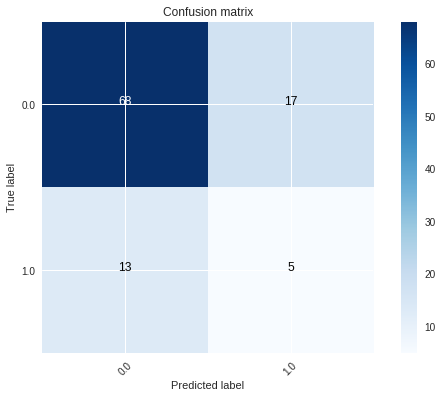

In [0]:
test_pipeline(dm_clf, X_train_plot, y_train, X_test_plot, y_test)

## Selection

In [0]:
from tpot import TPOTClassifier

In [0]:
pipeline_optimizer = TPOTClassifier(generations=25, 
                                    cv = 5 ,
                                    population_size=100,
                                    verbosity=3, 
                                    periodic_checkpoint_folder='smt_tpot_folder')



In [0]:
pipeline_optimizer.fit(X_train_plot, y_train)
pipeline_optimizer.export('unbalanced.py')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        85
         1.0       0.00      0.00      0.00        18

   micro avg       0.83      0.83      0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103

Confusion matrix, without normalization
[[85  0]
 [18  0]]


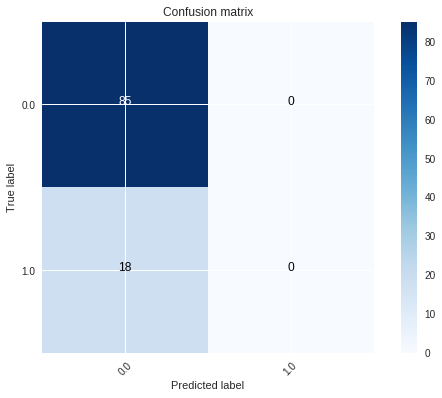

In [0]:
from xgboost import XGBClassifier

# Average CV score on the training set was:0.8374582340200911
exported_pipeline = XGBClassifier(learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.6500000000000001)

exported_pipeline.fit(X_train_plot, y_train)
results = exported_pipeline.predict(X_test_plot)
print(classification_report(y_test, results))
cm = confusion_matrix(y_test, results)
plot_confusion_matrix(cm, [0.0, 1.0])

Best Pipelines yielded ~84%, the class imbalance is too high and thus all predictions made by the models turn out to be Not Winners.

# Class Imbalance

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


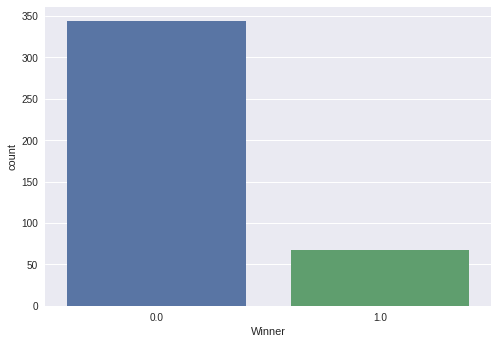

In [0]:
sns.countplot(y_train);

As we can see there is a large class imbalance between winner and losers, and when running models with the unaltered data the model defaults to predicting category 0(No Oscar). To counteract this we can use downsampling(Tomek links), upsampling(SMOTE) or a combination of both(SMOTE-Tomek).

## Using SMOTE

In [0]:
os = SMOTE(random_state=0)

columns = X_train_plot.columns

os_data_X,os_data_y=os.fit_sample(X_train_plot, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  688
Number of no subscription in oversampled data 344
Number of subscription 344
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [0]:
pipeline_optimizer.fit(os_data_X, os_data_y.values.ravel())
pipeline_optimizer.export('smote.py')

In [0]:
# Average CV score on the training set was:0.8779411764705882
smote_pipeline = make_pipeline(
    PCA(iterated_power=4, svd_solver="randomized"),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=11, n_estimators=100)
)

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        85
         1.0       0.20      0.11      0.14        18

   micro avg       0.77      0.77      0.77       103
   macro avg       0.51      0.51      0.50       103
weighted avg       0.72      0.77      0.74       103

Confusion matrix, without normalization


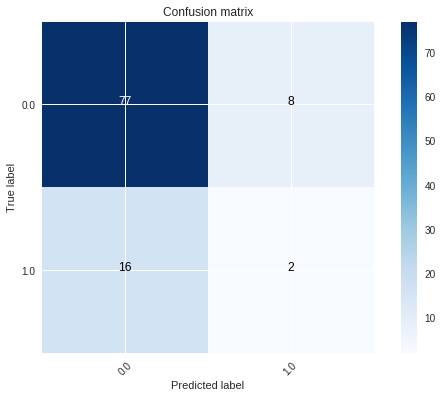

In [0]:
test_pipeline(smote_pipeline, 
              os_data_X, 
              os_data_y.values.ravel(), 
              X_test_plot, 
              y_test)

As can be seen by the confusion Matrix. Upsampling and creating synthetic data did help correct the class imbalance. However, the results are less than optimal, only 2 movies were correctly classified as having received Oscars while 24 were misclassified mostly landing on the False Negatives.

## Tomek Links

In [0]:
us = TomekLinks(random_state=0)

columns = X_train_plot.columns

us_data_X,us_data_y=os.fit_sample(X_train_plot, y_train)
us_data_X = pd.DataFrame(data=us_data_X,columns=columns )

us_data_y= pd.DataFrame(data=us_data_y,columns=['y'])

In [0]:
pipeline_optimizer.fit(us_data_X, us_data_y.values.ravel())
pipeline_optimizer.export('tomek.py')

In [0]:
# Average CV score on the training set was:0.8591858482523443
tomek_pipeline = make_pipeline(
    StandardScaler(),
    ZeroCount(),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    RobustScaler(),
    GradientBoostingClassifier(learning_rate=1.0, max_depth=6, max_features=0.45, min_samples_leaf=10, min_samples_split=15, n_estimators=100, subsample=0.7000000000000001)
)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        85
         1.0       0.20      0.17      0.18        18

   micro avg       0.74      0.74      0.74       103
   macro avg       0.51      0.51      0.51       103
weighted avg       0.72      0.74      0.73       103

Confusion matrix, without normalization


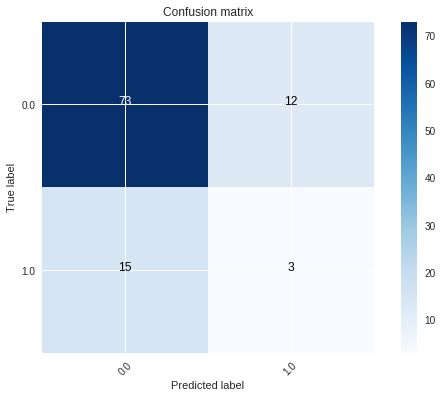

In [0]:
test_pipeline(tomek_pipeline, 
              us_data_X, 
              us_data_y.values.ravel(), 
              X_test_plot, 
              y_test)

Slightly Better at classifying true positives but did worse in misclassifying those false positives.

## Combining the two Methods: SMOTETomek

In [0]:
smt = SMOTETomek(ratio = 'auto',random_state=0)

columns = X_train_plot.columns

smt_data_X, smt_data_y = smt.fit_sample(X_train_plot, y_train)

smt_data_X = pd.DataFrame(data=smt_data_X, columns=columns )
smt_data_y= pd.DataFrame(data=smt_data_y, columns=['y'])

/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:53: DeprecationWarning: 'ratio' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.combine._smote_tomek.SMOTETomek'>. Use 'sampling_strategy' instead.
  category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:53: DeprecationWarning: 'ratio' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.over_sampling._smote.SMOTE'>. Use 'sampling_strategy' instead.
  category=DeprecationWarning)


In [0]:
pipeline_optimizer = TPOTClassifier(generations=25, 
                                    cv = 5 ,
                                    population_size=100,
                                    verbosity=3, 
                                    periodic_checkpoint_folder='topics_ns_tpot_folder')




In [0]:
# Note if this one isn't better than the other ones then undo dropping of values
# on genres- keep all.
pipeline_optimizer.fit(smt_data_X, smt_data_y.values.ravel())
pipeline_optimizer.export('lastone.py')

In [0]:
# Average CV score on the training set was:0.9283582089552238
# This model did not include Nominations and Wins
stm_pipeline = make_pipeline(
    FastICA(tol=0.1),
    ExtraTreesClassifier(bootstrap=False, 
                         criterion="entropy", 
                         max_features=0.6000000000000001, 
                         min_samples_leaf=2, 
                         min_samples_split=5, 
                         n_estimators=100, 
                         random_state=1989)
)

In [0]:
# Average CV score on the training set was:0.9604195804195804
exported_pipeline1 = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    PCA(iterated_power=2, svd_solver="randomized"),
    ExtraTreesClassifier(bootstrap=False, criterion="entropy", 
                         max_features=0.4, min_samples_leaf=1, 
                         min_samples_split=2, n_estimators=100,random_state=1989)
)
# 3 right, 2 FP

In [0]:
exported_pipeline1.fit(smt_data_X, 
              smt_data_y.values.ravel())


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('pca', PCA(copy=True, iterated_power=2, n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('extratreesclassifier', ExtraTreesClassifier(bootstrap=False, c...tors=100, n_jobs=None,
           oob_score=False, random_state=1989, verbose=0, warm_start=False))])

In [0]:
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        85
         1.0       1.00      0.28      0.43        18

   micro avg       0.87      0.87      0.87       103
   macro avg       0.93      0.64      0.68       103
weighted avg       0.89      0.87      0.84       103

Confusion matrix, without normalization


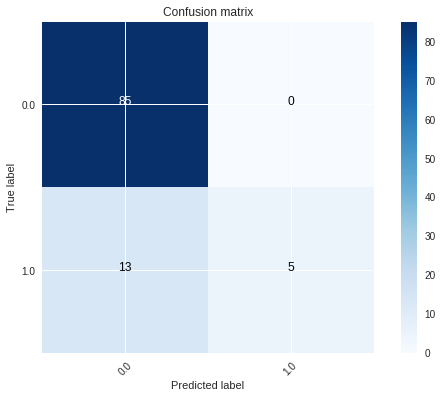

In [0]:
results = exported_pipeline1.predict(X_test_plot)
print(classification_report(y_test, results))
cm = confusion_matrix(y_test, results)
plot_confusion_matrix(cm, [0.0, 1.0])

In [466]:
accuracy_score(y_test, results)

0.8737864077669902

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92        85
         1.0       0.67      0.33      0.44        18

   micro avg       0.85      0.85      0.85       103
   macro avg       0.77      0.65      0.68       103
weighted avg       0.84      0.85      0.83       103

Confusion matrix, without normalization


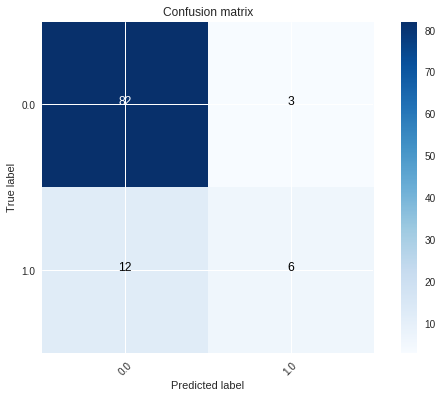

In [0]:
test_pipeline(exported_pipeline1, 
              smt_data_X, 
              smt_data_y.values.ravel(), 
              X_test_plot, 
              y_test)

              precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        85
         1.0       0.21      0.61      0.31        18

   micro avg       0.53      0.53      0.53       103
   macro avg       0.54      0.56      0.48       103
weighted avg       0.75      0.53      0.59       103

Confusion matrix, without normalization


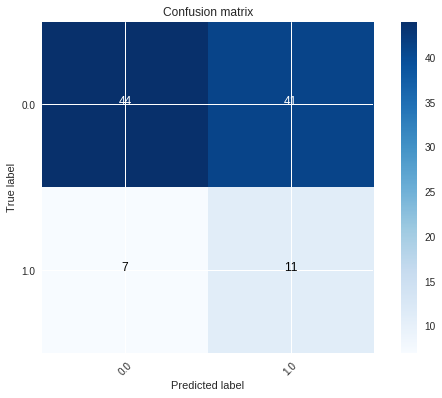

In [0]:
test_pipeline(dm_clf, 
              smt_data_X, 
              smt_data_y.values.ravel(), 
              X_test_plot, 
              y_test)

As can be see, the combined SMOTETomek model preforms better than the previous ones and reduces misclassification. In comparison to a DummyClassifier it preforms better even though it doesn't predict as many true positives as the dummy does and that is due to the Dummy misclassifying too many false positives.


# Furthur EDA

/usr/local/lib/python3.6/dist-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/usr/local/lib/python3.6/dist-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


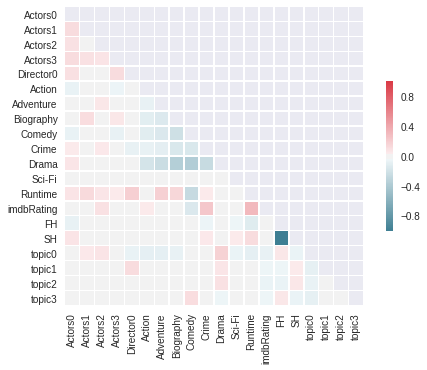

In [0]:
corr = X_train_plot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #sets the color
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [0]:
features_selected_train = X_train_plot.copy(deep=True)
len(X_train_plot.columns), len(features_selected_train.columns)
# as you can see, 14 variables were dropped (54 to 40) due to being below the threshold.
# this means their variance was lower than 0.7, meaning they didn't vary much over time over states

(22, 22)

In [0]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
# we dont want features that are highly correlated with each other
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

features_selected_train.drop(columns=to_drop, inplace=True)

len(to_drop), len(features_selected_train.columns)
# as you can see, we dropped 1 variables. now we have 32 features

(1, 21)

In [0]:

test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

features_selected_train = features_selected_train[features_selected_train.columns[test.get_support(indices=True)]]
new_cols = features_selected_train.columns

# Testing Final

## Dummy After Feature Reduction

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        85
         1.0       0.27      0.33      0.30        18

   micro avg       0.73      0.73      0.73       103
   macro avg       0.56      0.57      0.57       103
weighted avg       0.75      0.73      0.74       103

Confusion matrix, without normalization


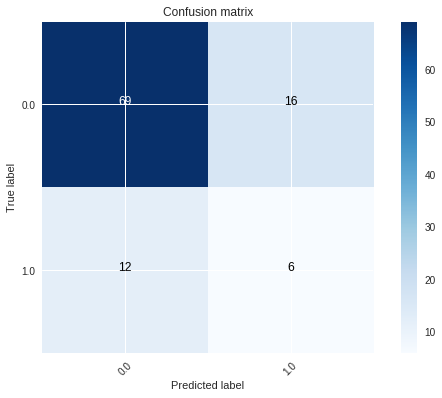

In [0]:
test_pipeline(dm_clf, 
              features_selected_train, 
              y_train, 
              X_test_plot[new_cols], 
              y_test)

## New Model Search

In [0]:
pipeline_optimizer = TPOTClassifier(generations=25, 
                                    cv = 5 ,
                                    population_size=25,
                                    verbosity=3, 
#                                     periodic_checkpoint_folder='smt_tpot_folder'
                                   )




# Predicting The 2019 Oscars

## Functions

In [0]:
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'BEST PICTURE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    statement = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['statement'] = statement
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

## Predictions

In [0]:
films = ['BLACK PANTHER', 'BLACKKKLANSMAN', 'BOHEMIAN RHAPSODY', 'THE FAVOURITE', 'GREEN BOOK', 'ROMA', 'A STAR IS BORN' , 'VICE']

In [0]:
def builder(listy):
  all_ = []
  for film in listy:
    all_.append({'Year' :2018,	
                 'Ceremony': 91	,
                 'Award': 'Best Picture',
                 'Winner' : 0	,	
                 'Production': None, 
                 'Film': film})
  return all_
  

In [0]:
fut = builder(films)

In [0]:
fut = pd.DataFrame(fut)

In [0]:
dat = get_data(fut)
dat = pd.DataFrame(dat)

In [0]:
fd = pd.concat([dat, fut], axis=1)

In [0]:
cmbd = make_int(fd, ['imdbRating', 'imdbVotes'])
y = cmbd[['Runtime']].applymap(lambda x: int(x[:-4]))
cmbd['Runtime'] = y

cmbd['Released'] = cmbd[['Released']].applymap(lambda x: x[3:-5])


In [0]:
cmbd['Released'] = cmbd['Released'].astype('category')

act = pd.DataFrame(get_list(cmbd, 'Actors'))
gen = pd.DataFrame(get_list(cmbd, 'Genre'))
wri = pd.DataFrame(get_list(cmbd, 'Writer'))
dire = pd.DataFrame(get_list(cmbd, 'Director'))



In [0]:
semi = pd.concat([cmbd, act, gen, wri, dire], axis=1 )

In [0]:
semi = semi[list(set(columns) - set(['index'])) + actors_cols + director_cols + genres_cols + writer_cols]
semi[writer_cols] = semi[writer_cols].applymap(remove_text_inside_brackets)

In [0]:
current = set(semi.columns)

In [0]:
current - set(cols_to_have)

set()

In [0]:
ad = semi[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Year']]
pep = cycle_(ad)
pep = pep[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0']]
                          
gd = pd.get_dummies(semi[['Genre0']])
gd.columns = [x[7:] for x in gd.columns]

rl = pd.get_dummies(semi[['Released']])
rl.columns = [x[9:] for x in rl.columns]
semi.drop('Released', inplace=True, axis=1)
semi.drop(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Genre0', 'Genre1'], inplace=True, axis=1)
md = pd.concat([pep , gd,rl ,semi], axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
semi.shape

(8, 22)

In [0]:
extra = list(set(fcolumns) - set(md.columns))

In [0]:
to_attach = pd.DataFrame(np.zeros((8,len(extra))), columns=extra)

In [0]:
to_attach.columns

Index(['Sci-Fi', 'Short', 'Animation', 'Jun', 'Sep', 'Musical', 'Adventure',
       'Family', 'Western', 'Fantasy', 'Film-Noir', 'Mar', 'Comedy', 'Jan',
       'May', 'Mystery', 'Crime', 'Jul', 'Music', 'Horror', 'Apr'],
      dtype='object')

In [0]:
fcolumns = ['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western','Country', 'Plot',  'Runtime','imdbRating', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep','Awards','Winner']


In [0]:
sem = pd.concat([to_attach, md], axis=1)

In [0]:
sem.columns

Index(['Sci-Fi', 'Short', 'Animation', 'Jun', 'Sep', 'Musical', 'Adventure',
       'Family', 'Western', 'Fantasy', 'Film-Noir', 'Mar', 'Comedy', 'Jan',
       'May', 'Mystery', 'Crime', 'Jul', 'Music', 'Horror', 'Apr', 'Actors0',
       'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action', 'Biography',
       'Drama', 'Aug', 'Dec', 'Feb', 'Nov', 'Oct', 'Metascore', 'Writer',
       'Runtime', 'Film', 'Director', 'imdbVotes', 'Title', 'Awards', 'Year',
       'Ratings', 'Language', 'Winner', 'Plot', 'Award', 'Country',
       'Production', 'Genre', 'Actors', 'imdbRating', 'Ceremony', 'Writer0',
       'Writer1'],
      dtype='object')

In [0]:
mdf = sem[fcolumns]


In [0]:
mdf['FH'] = mdf[['Feb']].sum(axis=1)
mdf['SH'] = mdf[['Aug', 'Nov', 'Dec', 'Oct']].sum(axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# modeling_df.drop(beg+end, inplace=True)
mdf = mdf[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Sci-Fi'
                           ,'Country', 'Plot',  'Runtime','imdbRating','FH','SH','Awards','Winner']]




In [0]:
kk = mdf['Awards']
kk = kk.apply(lambda x: x[x.find('.')+2:-1] if type(x) == str else '0')
kk = kk.apply(lambda x: x.split())

awd = pd.DataFrame(list(kk.apply(get_wins_nom)))

mdf.drop('Awards', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
mdf.drop('Winner', inplace=True, axis=1)
testings = pd.concat([mdf, awd], axis =1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
plot_t = mdf['Plot'].apply(text_cleaner)
r = tfidf.transform(plot_t)
plot_t = pd.DataFrame(r.toarray(), columns=tfidf_feature_names)
nmf_t = pd.DataFrame(nmf.transform(plot_t), columns=topics)

testings_plot = pd.concat([testings, nmf_t], axis=1)

testings_plot.drop(['Plot', 'Country'], inplace=True, axis=1)

In [0]:
preds = exported_pipeline1.predict_proba(testings_plot)

In [0]:
pred_df = pd.DataFrame(preds, columns=['NO Win', 'WIN'])

In [0]:
full_preds = pd.concat([fut, pred_df], axis =1)
full_preds.drop('Production', inplace=True, axis=1)
full_preds

,Award,Ceremony,Film,Winner,Year,NO Win,WIN
0,Best Picture,91,BLACK PANTHER,0,2018,0.72,0.28
1,Best Picture,91,BLACKKKLANSMAN,0,2018,0.81,0.19
2,Best Picture,91,BOHEMIAN RHAPSODY,0,2018,0.73,0.27
3,Best Picture,91,THE FAVOURITE,0,2018,0.62,0.38
4,Best Picture,91,GREEN BOOK,0,2018,0.79,0.21
5,Best Picture,91,ROMA,0,2018,0.73,0.27
6,Best Picture,91,A STAR IS BORN,0,2018,0.75,0.25
7,Best Picture,91,VICE,0,2018,0.59,0.41
